In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('olx_rent_data_new.csv')

In [3]:
data.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700,4000,North-East,6,"Andheri East, Mumbai, Maharashtra","₹ 42,000"
1,Apartments,1,2,Furnished,399,999,East,4,"Andheri East, Mumbai, Maharashtra","₹ 20,000"
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Apartments,1,1,Furnished,550,5500,North-East,3,"Chikhali, Pune, Maharashtra","₹ 5,500"
4,Apartments,2,2,Semi-Furnished,800,1000,East,4,"Model Colony, Nashik, Maharashtra","₹ 15,000"


In [4]:
data.shape

(1200, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type                   1200 non-null   object
 1   bedroom                1200 non-null   object
 2   bathroom               1200 non-null   object
 3   furnishing             1200 non-null   object
 4   Carpet Area (ft²)      1200 non-null   object
 5   Maintenance (Monthly)  1200 non-null   int64 
 6   facing                 1200 non-null   object
 7   Total floor            1200 non-null   int64 
 8   state                  1200 non-null   object
 9   Rent                   1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [6]:
data.iloc[640:,:]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
640,Apartments,3,3,Semi-Furnished,1600,3000,North-East,12,"Gomti Nagar, Lucknow, Uttar Pradesh","₹ 16,000"
641,Builder Floors,3,2,Semi-Furnished,1020,0,North-East,5,"Noida Extension, Noida, Uttar Pradesh","₹ 8,650"
642,Apartments,2,2,Unfurnished,3200,200,South-East,3,"Kursi Road, Lucknow, Uttar Pradesh","₹ 7,500"
643,Apartments,2,2,Unfurnished,1500,3,VDA COLONY PHASE-1 NEAR DR BHIM RAO AMBEDKAR H...,1,"VDA Colony, Varanasi, Uttar Pradesh","₹ 11,000"
644,Apartments,3,3,Furnished,1300,1500,North-West,6,"Sector 104, Noida, Uttar Pradesh","₹ 25,000"
...,...,...,...,...,...,...,...,...,...,...
1195,Apartments,2,2,Semi-Furnished,1000,400,North,2,"Chromepet Radha Nagar, Chennai, Tamil Nadu","₹ 10,000"
1196,Houses & Villas,2,1,Semi-Furnished,650,0,South,2,"Villivakkam North Jagannath Nagar, Chennai, Ta...","₹ 12,000"
1197,Houses & Villas,1,1,Unfurnished,00,0,வணக்கம்,0,"Veerapandi, Tiruppur, Tamil Nadu","₹ 4,000"
1198,Apartments,2,2,Semi-Furnished,1085,2200,North,4,"Arcot Road, Chennai, Tamil Nadu","₹ 22,000"


In [7]:
data['Maintenance (Monthly)'].value_counts()

-1        302
 0        279
 500       79
 1000      45
 100       37
         ... 
 875        1
 6000       1
 14000      1
 1335       1
 900        1
Name: Maintenance (Monthly), Length: 100, dtype: int64

In [8]:
df=data[data['Maintenance (Monthly)']!=-1]

In [9]:
df.shape

(898, 10)

In [10]:
df['Maintenance (Monthly)'].value_counts()

0        279
500       79
1000      45
100       37
1500      32
        ... 
875        1
6000       1
14000      1
1335       1
900        1
Name: Maintenance (Monthly), Length: 99, dtype: int64

In [11]:
df=df.drop_duplicates(ignore_index=True)

In [12]:
df.shape

(887, 10)

In [13]:
df.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700,4000,North-East,6,"Andheri East, Mumbai, Maharashtra","₹ 42,000"
1,Apartments,1,2,Furnished,399,999,East,4,"Andheri East, Mumbai, Maharashtra","₹ 20,000"
2,Apartments,1,1,Furnished,550,5500,North-East,3,"Chikhali, Pune, Maharashtra","₹ 5,500"
3,Apartments,2,2,Semi-Furnished,800,1000,East,4,"Model Colony, Nashik, Maharashtra","₹ 15,000"
4,Apartments,3,3,Furnished,1800,2000,East,5,"Serene Meadows, Nashik, Maharashtra","₹ 31,000"


In [14]:
df['Rent'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
df['Rent'] = df['Rent'].astype('int64')

In [15]:
df.Type.value_counts()

Apartments         467
Houses & Villas    315
Builder Floors     105
Name: Type, dtype: int64

In [16]:
df.bedroom.value_counts()

2     429
1     287
3     148
4      14
4+      9
Name: bedroom, dtype: int64

In [17]:
i=df[(df['bedroom']=='4+') ].index

In [18]:
i

Int64Index([170, 280, 310, 350, 464, 467, 542, 742, 776], dtype='int64')

In [19]:
df.loc[i,'bedroom']=5

In [20]:
df['bedroom'] = df['bedroom'].astype('int64')

In [21]:
df.bathroom.value_counts()

2            409
1            358
3            103
4             10
4+             6
Furnished      1
Name: bathroom, dtype: int64

In [22]:
df.loc[563,'bathroom']=1

In [23]:
i=df[(df['bathroom']=='4+') ].index

In [24]:
df.loc[i,'bathroom']=5

In [25]:
df['bathroom'] = df['bathroom'].astype('int64')

In [26]:
df.furnishing.value_counts()

Semi-Furnished    434
Unfurnished       257
Furnished         194
Builder             1
Owner               1
Name: furnishing, dtype: int64

In [27]:
df[(df['furnishing']=='Owner') | (df['furnishing']=='Builder')]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
199,Apartments,1,1,Builder,Yes,2,SK APARTMENT,2,"Mekkara, Thrippunithura, Kerala",7000
563,Houses & Villas,2,1,Owner,Yes,1,Sakunthala nilayam,0,"Maragondanahalli, Bengaluru, Karnataka",15000


In [28]:
df.loc[563,'furnishing']='Furnished'

In [29]:
df.loc[199,'furnishing']='Semi-Furnished' #mode value

In [30]:
df.furnishing.value_counts()

Semi-Furnished    435
Unfurnished       257
Furnished         195
Name: furnishing, dtype: int64

In [31]:
df.facing.value_counts()

East                                         321
North                                        142
North-East                                   119
West                                          75
South                                         47
                                            ... 
S&S builders                                   1
Independent house for rent in Uliyil town      1
Shagun                                         1
Apartment for Rent                             1
வணக்கம்                                        1
Name: facing, Length: 137, dtype: int64

In [32]:
i=df[(df['facing']!= 'East' )&( df['facing']!='North-East') & (df['facing']!='North') & (df['facing']!='West') & (df['facing']!='South')&( df['facing']!='North-West')&( df['facing']!='South-East')&( df['facing']!='South-West')].index

In [33]:
df.loc[i,'facing']='others'

In [34]:
df.facing.value_counts()

East          321
North         142
others        140
North-East    119
West           75
South          47
North-West     23
South-East     13
South-West      7
Name: facing, dtype: int64

In [35]:
df['Total floor'].value_counts()

2     214
1     155
3     140
4      98
5      46
0      34
7      28
12     19
6      16
15     16
19     13
11     13
14     11
13     11
10     10
8       9
22      8
24      6
9       5
17      5
25      4
20      4
26      4
18      3
16      3
21      3
23      2
27      2
30      2
32      2
28      1
Name: Total floor, dtype: int64

In [36]:
df['Carpet Area (ft²)'].value_counts()

1000    54
800     40
1200    38
600     36
500     33
        ..
1320     1
2700     1
399      1
1412     1
1085     1
Name: Carpet Area (ft²), Length: 199, dtype: int64

In [37]:
df[df['Carpet Area (ft²)']=='Yes']

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
191,Apartments,3,3,Unfurnished,Yes,5,others,1,"Mundamveli, Kochi, Kerala",12000
199,Apartments,1,1,Semi-Furnished,Yes,2,others,2,"Mekkara, Thrippunithura, Kerala",7000
563,Houses & Villas,2,1,Furnished,Yes,1,others,0,"Maragondanahalli, Bengaluru, Karnataka",15000


In [38]:
df.loc[[563,199,191],'Carpet Area (ft²)']=np.NaN

In [39]:
df[df['Carpet Area (ft²)']=='No']

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
61,Apartments,1,1,Unfurnished,No,4,others,1,"Keshav Nagar, Pune, Maharashtra",5000


In [40]:
df.loc[61,'Carpet Area (ft²)']=np.NaN

In [41]:
df['Carpet Area (ft²)'] = df['Carpet Area (ft²)'].astype('float64')

In [42]:
df['Carpet Area (ft²)'].max()

7005565310.0

In [43]:
df[df['Carpet Area (ft²)']==7005565310.0]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
422,Houses & Villas,1,1,Semi-Furnished,7.005565e+09,1,others,1,"Kankarkhera, Meerut, Uttar Pradesh",3800


In [44]:
i=df[df['Carpet Area (ft²)']<100].index

In [45]:
df.loc[i,'Carpet Area (ft²)']=np.NaN

In [46]:
df.loc[422,'Carpet Area (ft²)']=np.NaN

In [47]:
df

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700.0,4000,North-East,6,"Andheri East, Mumbai, Maharashtra",42000
1,Apartments,1,2,Furnished,399.0,999,East,4,"Andheri East, Mumbai, Maharashtra",20000
2,Apartments,1,1,Furnished,550.0,5500,North-East,3,"Chikhali, Pune, Maharashtra",5500
3,Apartments,2,2,Semi-Furnished,800.0,1000,East,4,"Model Colony, Nashik, Maharashtra",15000
4,Apartments,3,3,Furnished,1800.0,2000,East,5,"Serene Meadows, Nashik, Maharashtra",31000
...,...,...,...,...,...,...,...,...,...,...
882,Apartments,2,2,Semi-Furnished,1000.0,400,North,2,"Chromepet Radha Nagar, Chennai, Tamil Nadu",10000
883,Houses & Villas,2,1,Semi-Furnished,650.0,0,South,2,"Villivakkam North Jagannath Nagar, Chennai, Ta...",12000
884,Houses & Villas,1,1,Unfurnished,NaN,0,others,0,"Veerapandi, Tiruppur, Tamil Nadu",4000
885,Apartments,2,2,Semi-Furnished,1085.0,2200,North,4,"Arcot Road, Chennai, Tamil Nadu",22000


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


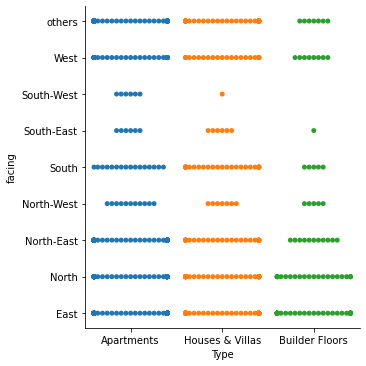

In [48]:
sns.catplot(x="Type", y="facing", kind='swarm',data=df)

In [49]:
df.columns

Index(['Type', 'bedroom', 'bathroom', 'furnishing', 'Carpet Area (ft²)',
       'Maintenance (Monthly)', 'facing', 'Total floor', 'state', 'Rent'],
      dtype='object')

<AxesSubplot:xlabel='Total floor', ylabel='count'>

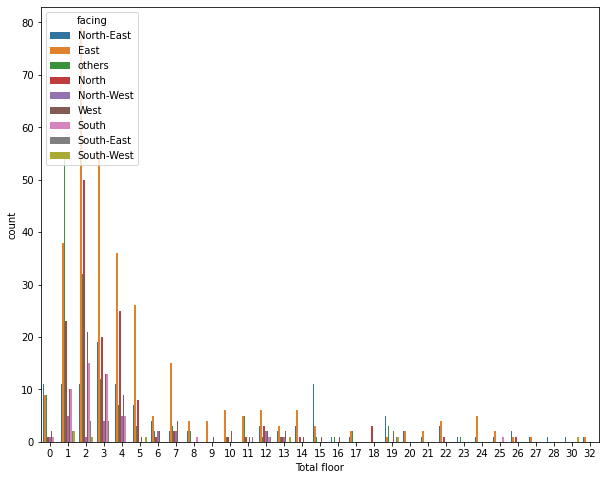

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(x='Total floor',hue='facing',data=df)

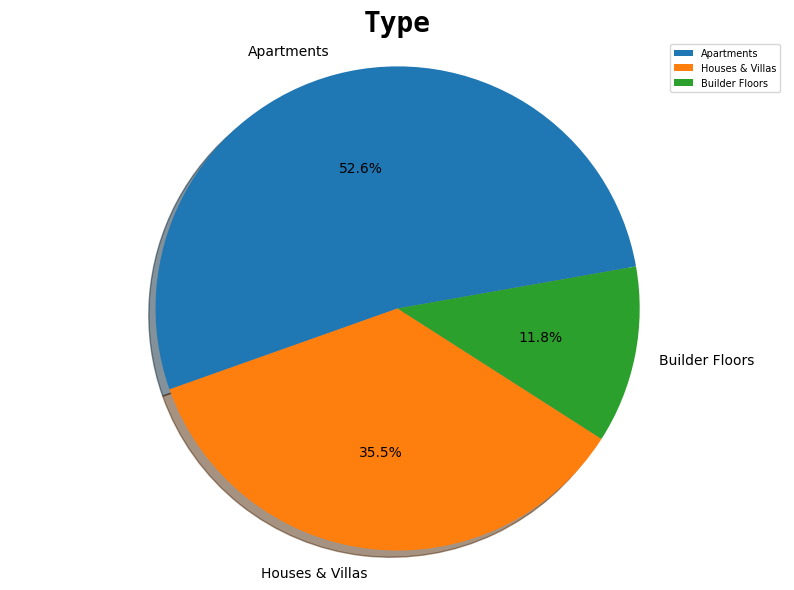

In [51]:
prof = df['Type'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(prof.values, labels=prof.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Type', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

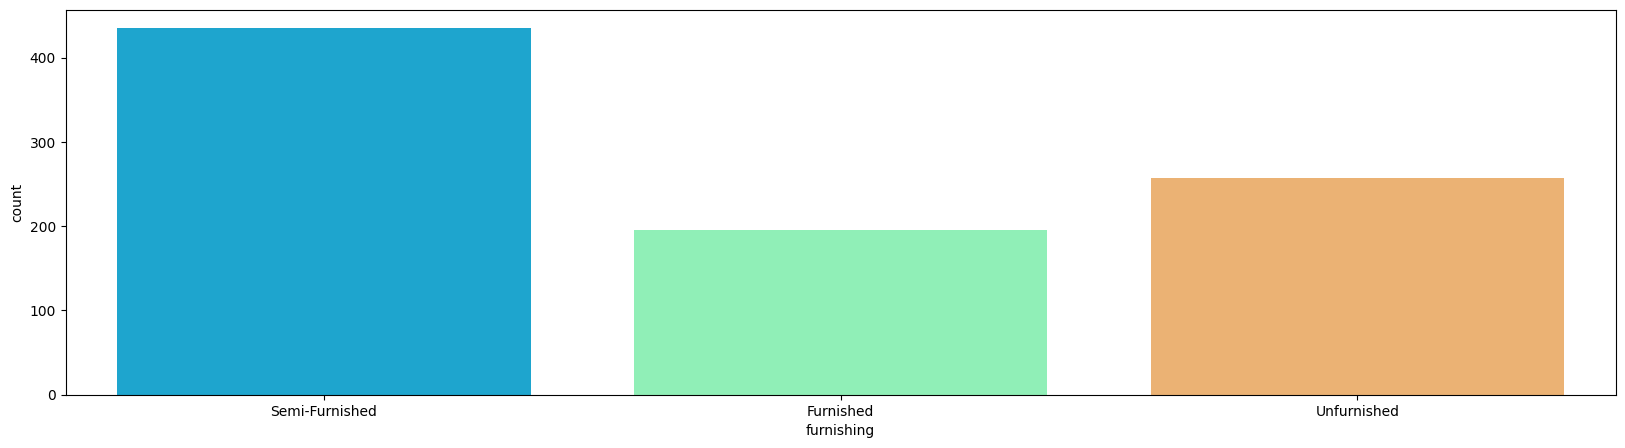

In [52]:

plt.figure(figsize=(20, 5))
sns.countplot(x="furnishing", data=df,palette='rainbow')
plt.show()

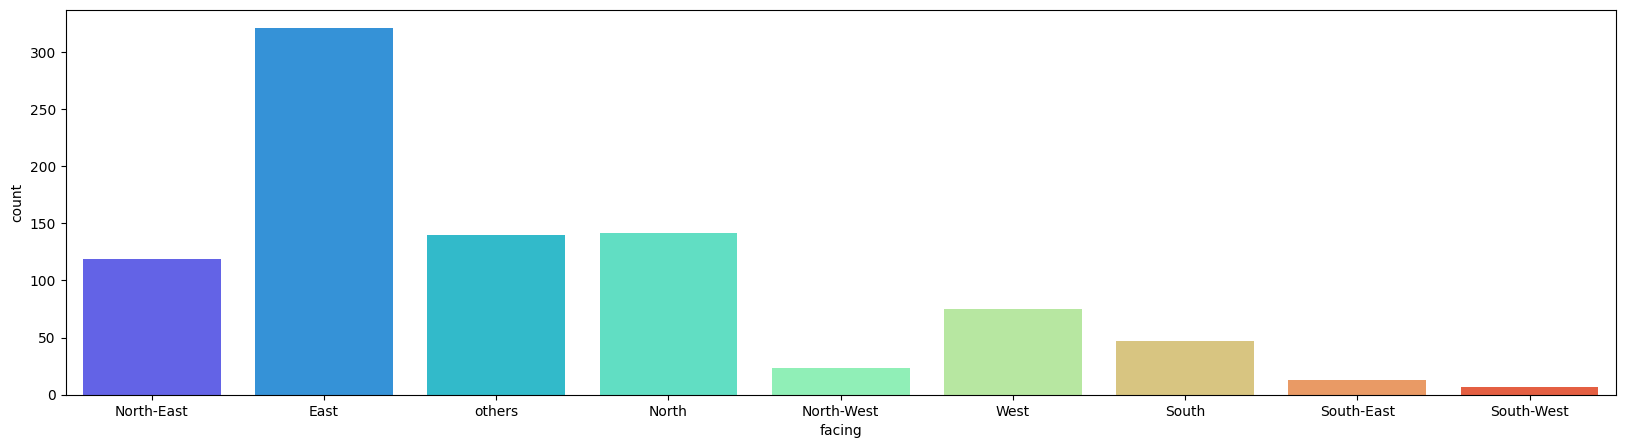

In [53]:
plt.figure(figsize=(20, 5))
sns.countplot(x="facing", data=df,palette='rainbow')
plt.show()

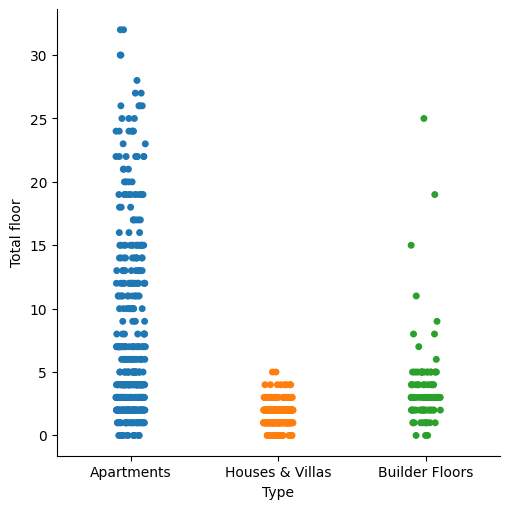

In [54]:
import seaborn as sns
sns.catplot(x="Type", y="Total floor",kind='strip',data=df)

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='bathroom'>

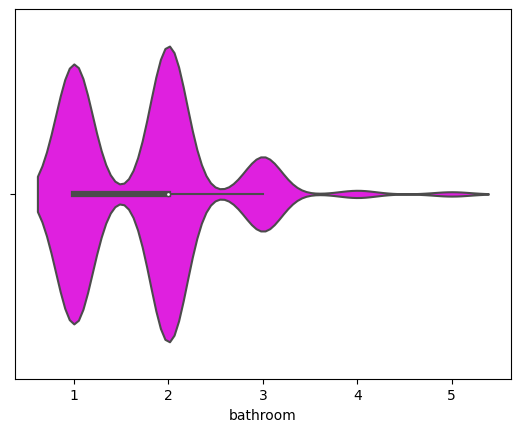

In [55]:
sns.violinplot(df['bathroom'], orient='vertical', color='magenta')

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='bedroom'>

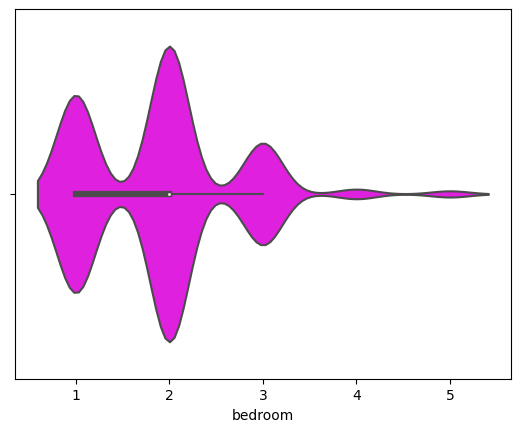

In [56]:
sns.violinplot(df['bedroom'], orient='vertical', color='magenta')

<AxesSubplot:>

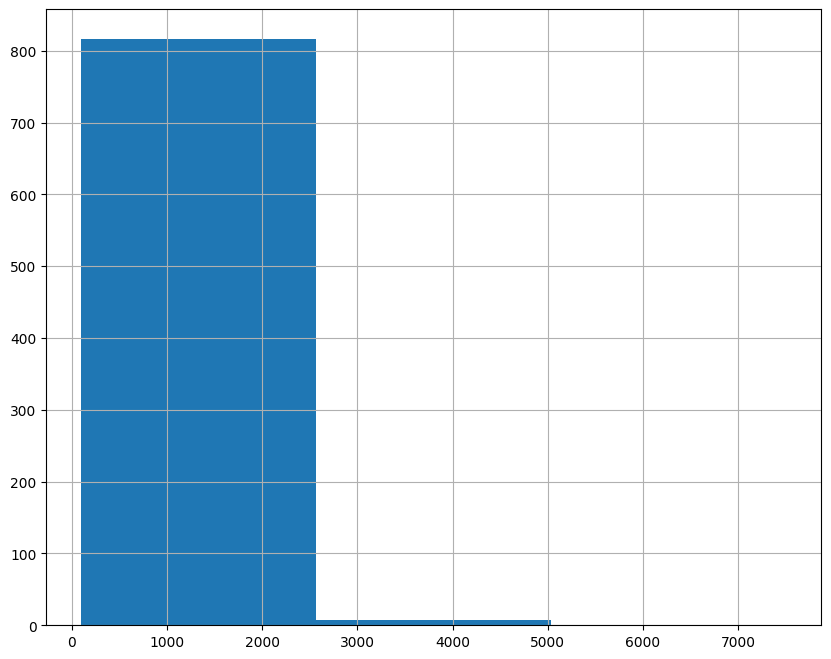

In [57]:
df['Carpet Area (ft²)'].hist(bins=3,figsize=(10,8))

In [58]:
df['states']=df.state.apply(lambda x:x.split(',')[-1])

In [59]:
df['city']=df.state.apply(lambda x:x.split(',')[-2])

In [60]:
df.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent,states,city
0,Apartments,2,2,Semi-Furnished,700.0,4000,North-East,6,"Andheri East, Mumbai, Maharashtra",42000,Maharashtra,Mumbai
1,Apartments,1,2,Furnished,399.0,999,East,4,"Andheri East, Mumbai, Maharashtra",20000,Maharashtra,Mumbai
2,Apartments,1,1,Furnished,550.0,5500,North-East,3,"Chikhali, Pune, Maharashtra",5500,Maharashtra,Pune
3,Apartments,2,2,Semi-Furnished,800.0,1000,East,4,"Model Colony, Nashik, Maharashtra",15000,Maharashtra,Nashik
4,Apartments,3,3,Furnished,1800.0,2000,East,5,"Serene Meadows, Nashik, Maharashtra",31000,Maharashtra,Nashik


In [61]:
df = df.loc[:,['Type','furnishing','Maintenance (Monthly)','states','city','bedroom','bathroom','Rent']]

In [62]:
df.head()

,Type,furnishing,Maintenance (Monthly),states,city,bedroom,bathroom,Rent
0,Apartments,Semi-Furnished,4000,Maharashtra,Mumbai,2,2,42000
1,Apartments,Furnished,999,Maharashtra,Mumbai,1,2,20000
2,Apartments,Furnished,5500,Maharashtra,Pune,1,1,5500
3,Apartments,Semi-Furnished,1000,Maharashtra,Nashik,2,2,15000
4,Apartments,Furnished,2000,Maharashtra,Nashik,3,3,31000


In [63]:
df['states'].unique()

array([' Maharashtra', ' India', ' Kerala', ' Uttar Pradesh',
       ' Karnataka', ' Tamil Nadu'], dtype=object)

In [64]:
df['city'].nunique()

111

In [65]:
df['states'].value_counts()

 Uttar Pradesh    194
 Karnataka        191
 Tamil Nadu       188
 Maharashtra      179
 Kerala           133
 India              2
Name: states, dtype: int64

In [66]:
df=df[df['states']!=' India']

In [67]:
df['states'].value_counts()

 Uttar Pradesh    194
 Karnataka        191
 Tamil Nadu       188
 Maharashtra      179
 Kerala           133
Name: states, dtype: int64

In [68]:
df.head()

,Type,furnishing,Maintenance (Monthly),states,city,bedroom,bathroom,Rent
0,Apartments,Semi-Furnished,4000,Maharashtra,Mumbai,2,2,42000
1,Apartments,Furnished,999,Maharashtra,Mumbai,1,2,20000
2,Apartments,Furnished,5500,Maharashtra,Pune,1,1,5500
3,Apartments,Semi-Furnished,1000,Maharashtra,Nashik,2,2,15000
4,Apartments,Furnished,2000,Maharashtra,Nashik,3,3,31000


In [69]:
df.pivot_table(values='Rent',index='states',aggfunc='mean',columns='Type')

Type,Apartments,Builder Floors,Houses & Villas
states,,,
Karnataka,342781.632911,60110.690476,69607.142857
Kerala,16046.514286,6750.000000,220209.016393
Maharashtra,21666.716216,257375.000000,17263.157895
Tamil Nadu,111637.333333,51157.894737,104907.978723
Uttar Pradesh,70502.425532,63203.900000,8283.571429


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Type', ylabel='states'>

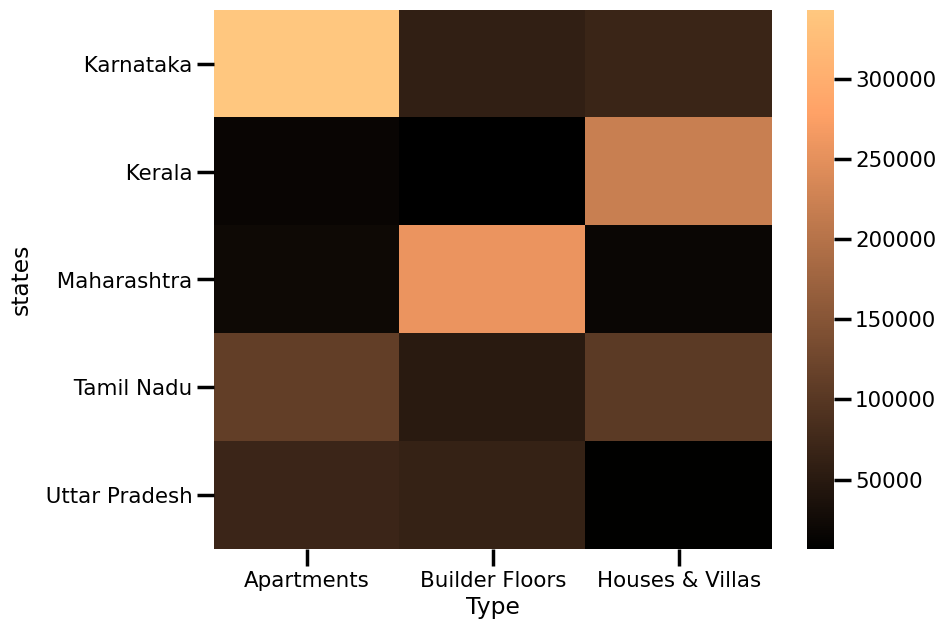

In [71]:
sns.set_context('poster',0.7)
plt.figure(figsize=(9,7))
sns.heatmap(df.pivot_table(values='Rent',index='states',aggfunc='mean',columns='Type'),cmap='copper')


In [72]:
df.pivot_table(values='Rent',index='furnishing',aggfunc='mean',columns='Type')

Type,Apartments,Builder Floors,Houses & Villas
furnishing,,,
Furnished,30714.304348,108249.863636,266563.793103
Semi-Furnished,162197.017241,93533.072727,38061.904762
Unfurnished,44099.613445,34605.357143,73565.596330


<AxesSubplot:xlabel='Type', ylabel='furnishing'>

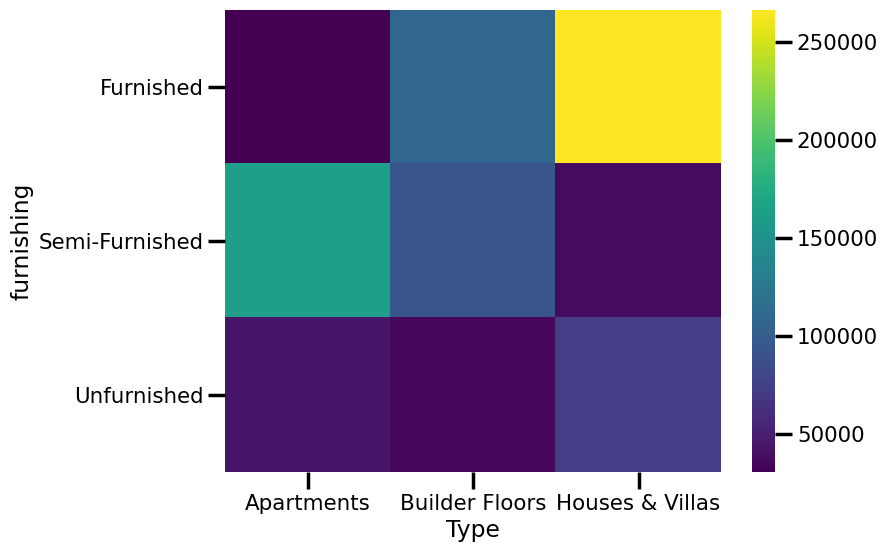

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(df.pivot_table(values='Rent',index='furnishing',aggfunc='mean',columns='Type'),cmap='viridis')


In [74]:
df.head()

,Type,furnishing,Maintenance (Monthly),states,city,bedroom,bathroom,Rent
0,Apartments,Semi-Furnished,4000,Maharashtra,Mumbai,2,2,42000
1,Apartments,Furnished,999,Maharashtra,Mumbai,1,2,20000
2,Apartments,Furnished,5500,Maharashtra,Pune,1,1,5500
3,Apartments,Semi-Furnished,1000,Maharashtra,Nashik,2,2,15000
4,Apartments,Furnished,2000,Maharashtra,Nashik,3,3,31000


In [75]:
df.pivot_table(index='bedroom',values='Rent').sort_values('Rent',ascending=False)

,Rent
bedroom,
4,737535.714286
3,151626.054054
2,92615.813084
5,40000.000000
1,39206.989510


In [76]:
df.pivot_table(index='bedroom',values='Rent',columns='Type')

Type,Apartments,Builder Floors,Houses & Villas
bedroom,,,
1,27774.724638,59713.160714,43873.369565
2,113050.393805,50162.605263,74292.682927
3,171438.444444,348294.444444,58340.000000
4,26500.000000,NaN,856041.666667
5,2000.000000,55000.000000,41333.333333


<AxesSubplot:xlabel='bedroom', ylabel='Type'>

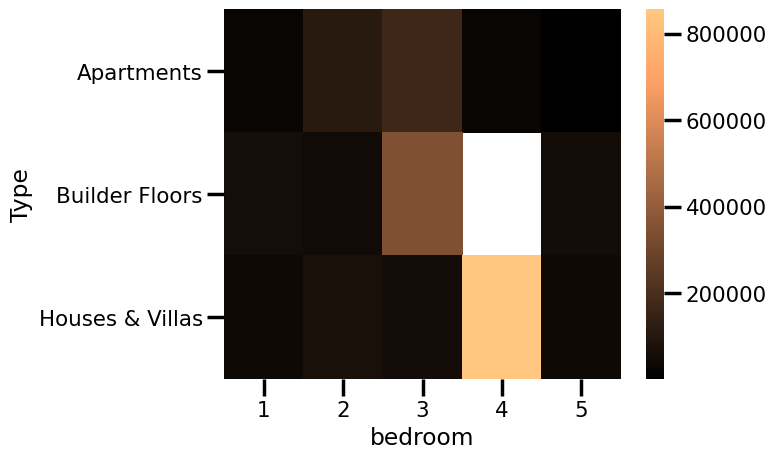

In [77]:
sns.heatmap(df.pivot_table(index='bedroom',values='Rent',columns='Type').T,cmap='copper')

In [78]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

In [79]:
df[df['Rent']>9900000]

,Type,furnishing,Maintenance (Monthly),states,city,bedroom,bathroom,Rent
226,Houses & Villas,Furnished,2,Kerala,Changanacheri,4,4,10000000
640,Apartments,Semi-Furnished,2500,Karnataka,Bengaluru,2,2,16450000


In [80]:
df.loc[226,'Rent']=1000000
df.loc[640,'Rent']=1645000

KeyError: 'Carpet Area (ft²)'

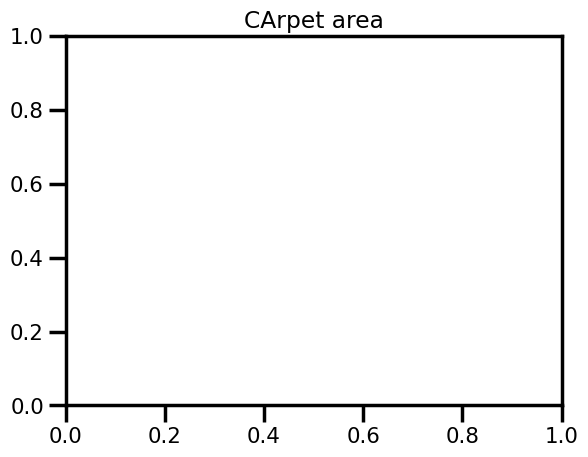

In [81]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('CArpet area')
ax1.boxplot(df['Carpet Area (ft²)'].dropna(),vert=False)
plt.show()

## Missing values imputation using regression

In [82]:
d2=df.copy()

In [83]:
#categorical data
categorical_cols = ['Type'] 

#import pandas as pd
d2 = pd.get_dummies(d2, columns = categorical_cols)

In [84]:
d2.corr()

,Maintenance (Monthly),bedroom,bathroom,Rent,Type_Apartments,Type_Builder Floors,Type_Houses & Villas
Maintenance (Monthly),1.000000,0.046116,0.010953,-0.005930,0.031893,-0.012341,-0.024941
bedroom,0.046116,1.000000,0.781856,0.095302,0.033202,-0.136454,0.057576
bathroom,0.010953,0.781856,1.000000,0.059509,0.118000,-0.158958,-0.015707
Rent,-0.005930,0.095302,0.059509,1.000000,-0.000592,0.015469,-0.009837
Type_Apartments,0.031893,0.033202,0.118000,-0.000592,1.000000,-0.386931,-0.782047
Type_Builder Floors,-0.012341,-0.136454,-0.158958,0.015469,-0.386931,1.000000,-0.272078
Type_Houses & Villas,-0.024941,0.057576,-0.015707,-0.009837,-0.782047,-0.272078,1.000000


In [85]:
d2.columns

Index(['furnishing', 'Maintenance (Monthly)', 'states', 'city', 'bedroom',
       'bathroom', 'Rent', 'Type_Apartments', 'Type_Builder Floors',
       'Type_Houses & Villas'],
      dtype='object')

In [86]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 886
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   furnishing             885 non-null    object
 1   Maintenance (Monthly)  885 non-null    int64 
 2   states                 885 non-null    object
 3   city                   885 non-null    object
 4   bedroom                885 non-null    int64 
 5   bathroom               885 non-null    int64 
 6   Rent                   885 non-null    int64 
 7   Type_Apartments        885 non-null    uint8 
 8   Type_Builder Floors    885 non-null    uint8 
 9   Type_Houses & Villas   885 non-null    uint8 
dtypes: int64(4), object(3), uint8(3)
memory usage: 90.2+ KB


In [87]:
d2=d2.dropna()

In [93]:
X=d2.drop(['furnishing','Rent','states','city'],axis=1)
y=d2['Rent']

In [94]:
# import train_test_split module
from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets with test_size=0.3 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
from sklearn import linear_model


# Instantiate the linear regression object lm

lm= linear_model.LinearRegression()

# Fit and train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data

y_pred=lm.predict(X_test)
y_pred


array([ 81650.77855969, 102158.01896055,  81650.74405918,  29450.40064307,
        81650.77303961,  75141.59650691, 105610.47596346, 102157.99826025,
        14828.05889394,  29450.40064307,  45296.93142279,  81650.77855969,
        75141.60340701,  38787.75629771, 118004.59116848,  29450.39374297,
        75141.60340701,  38787.75629771, 102158.09483408,  38787.75629771,
        38787.75077763,  65804.24775237,  38787.75629771,  38787.70109689,
        45296.93139519,  81650.77855969,  29450.35234236,  38787.74939761,
       132626.96740432,  81650.77855969,  45296.91937521,  38787.75215765,
        35335.37519593,  45296.93140899,  81650.77441963,  45296.93145039,
        96273.12030882, 118004.59116848,  65804.24637235, 118004.59806858,
        81650.77851829,  29450.39788303,  29450.39857304, 112119.63731593,
       118004.62559999,  29450.39374297, 148473.45682483,  65804.23947225,
       118004.58426838, 163095.83997457,  81650.77855969, 132626.8846169 ,
        81650.75992941,  

In [96]:
# Compute model slope and intercept
print("Estimated model slope, a:",lm.coef_)
print("Estimated model intercept, b:",lm.intercept_)

Estimated model slope, a: [-1.38002043e-05  6.68227197e+04 -3.04688726e+04  7.45190199e+03
  9.42726834e+02 -8.39462882e+03]
Estimated model intercept, b: 1491.1823544224026


In [97]:
from sklearn.metrics import mean_squared_error

# Calculate and print Root Mean Square Error(RMSE)
mse= mean_squared_error(y_pred,y_test)
rmse= np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 240867.5435


In [98]:
from sklearn.metrics import r2_score

# Calculate and print r2_score
print("R2 Score value: {:.4f}".format(r2_score(y_test,y_pred)))


R2 Score value: -0.0206


In [99]:
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.0134
Test set score: -0.0206


In [100]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5)


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [103]:



# Making predictions
y_pred_default = lm.predict(X_test)



In [104]:
from sklearn.metrics import classification_report, confusion_matrix


# Making predictions
y_pred_default = clf.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         1
        1500       0.00      0.00      0.00         1
        1700       0.00      0.00      0.00         1
        2500       0.00      0.00      0.00         3
        2800       0.00      0.00      0.00         1
        3000       0.00      0.00      0.00         0
        3500       0.00      0.00      0.00         2
        3700       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         3
        4500       0.00      0.00      0.00         3
        4999       0.00      0.00      0.00         1
        5000       0.00      0.00      0.00         5
        5250       0.00      0.00      0.00         1
        5500       0.00      0.00      0.00         6
        5890       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6000       0.00      0.00      0.00         8
        6350       0.00    

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [105]:
print(confusion_matrix(y_test, y_pred_default))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [106]:
# Printing confusion matrix 
print(confusion_matrix(y_test, y_pred_default))
# Printing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_default))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.06766917293233082
